We want to a research on based on the prediction of Air Quality Index in 14 cities of Bangladesh. For this we needed a dataset, we gathered the dataset from the national portal of Department of Environment, Government of the People's Republic of Bangladesh, That have been uploading AQI of 14 cities of Bangladesh since 19th February 2023 and updating it on a daily basis < link -> https://doe.gov.bd/site/page/8efde0a3-392e-4a86-bac4-7149ff908be7/- >

A sample for the daily AQI report uploaded daily on the governmental portal is shown below. 

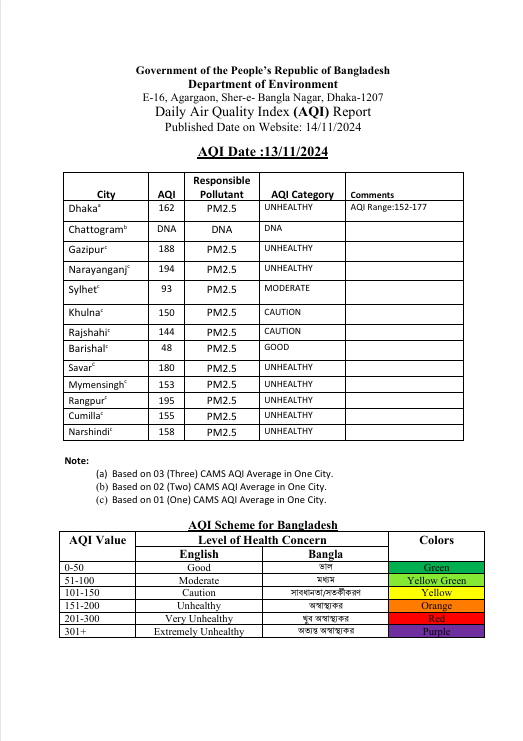

In [9]:
from IPython.display import Image  # Import for displaying images

image_location = "C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-11-15 235820.png"
display(Image(filename=image_location))

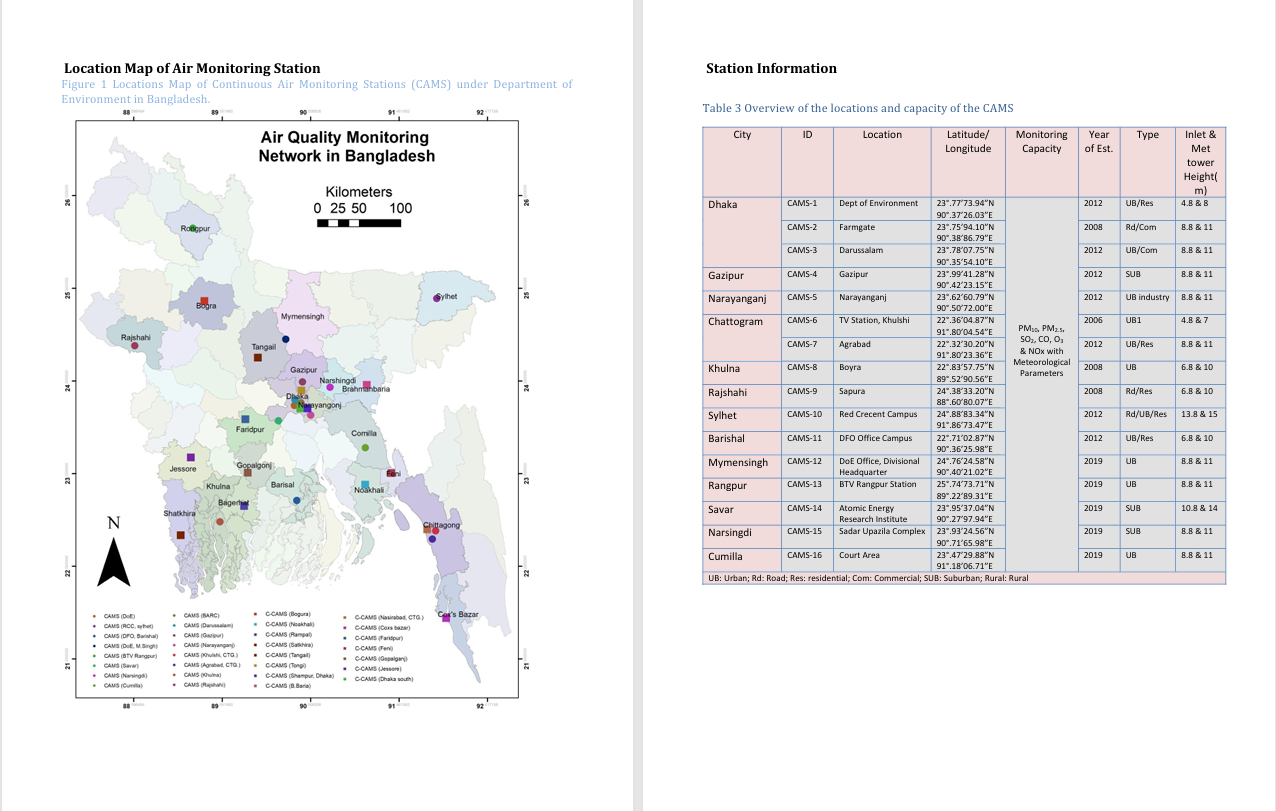

In [10]:
from IPython.display import Image  # Import for displaying images

image_location = "C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-11-16 001913.png"
display(Image(filename=image_location))

The daily reports showed the AQI of 14 cities, where AQI measurement of Dhaka was Based on 03 (Three) CAMS AQI Average, AQI measurement of Chattogram was Based on 02 (Two) CAMS AQI Average and the rest cities were Based on 01 (One) CAMS AQI Average. The CAMS location, Longitude, Magnitude can be shown in above Images along with it's annotation. The information of the cams locations were gathered from the latest "Air Quality Monthly Report AUGUST, 2024" published by same Department of Environment, Government of the People's Republic of Bangladesh. For details ->  https://doe.portal.gov.bd/site/page/ee9c841f-6aa6-4e65-975d-242e8681c62e
As we cant take direct screenshots due to plagiarism we generated the code for map and the annotations for the map. 


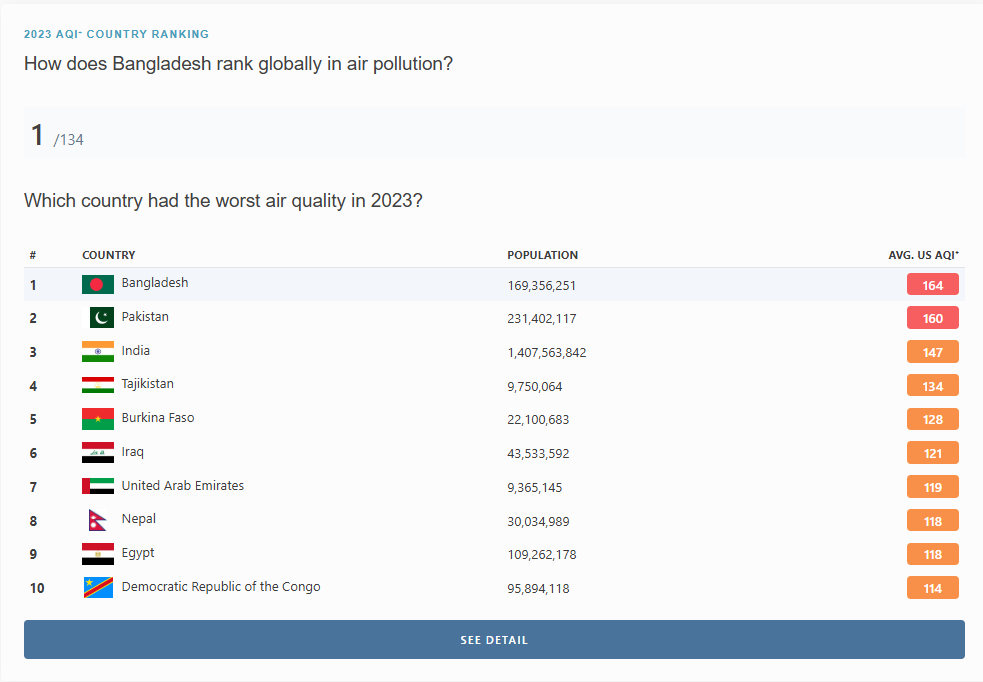

In [12]:
from IPython.display import Image  # Import for displaying images

image_location = "C:\\Users\\Acer\\OneDrive\\Pictures\\Screenshots\\Screenshot 2024-11-16 000823.png"
display(Image(filename=image_location))

Till now what we want to do in our research
1. Explore the data based on time series analysis. 
2. Explore which city is facing severe bad Air quality
3. Based on Yearly analysis which months face severe bad Air quality. 
4. One major concern about AQI is that in Bangladesh, it has been 1st in world rank as worst AQI since a couple of years. link -> https://www.iqair.com/bangladesh
5. Predict the value for AQI using AQI <we have implemented this without using hyper tuning>


ARIMA  is one of the most popular (if not the most popular) time series forecasting techniques -> https://www.datacamp.com/tutorial/arima

# The Code begins

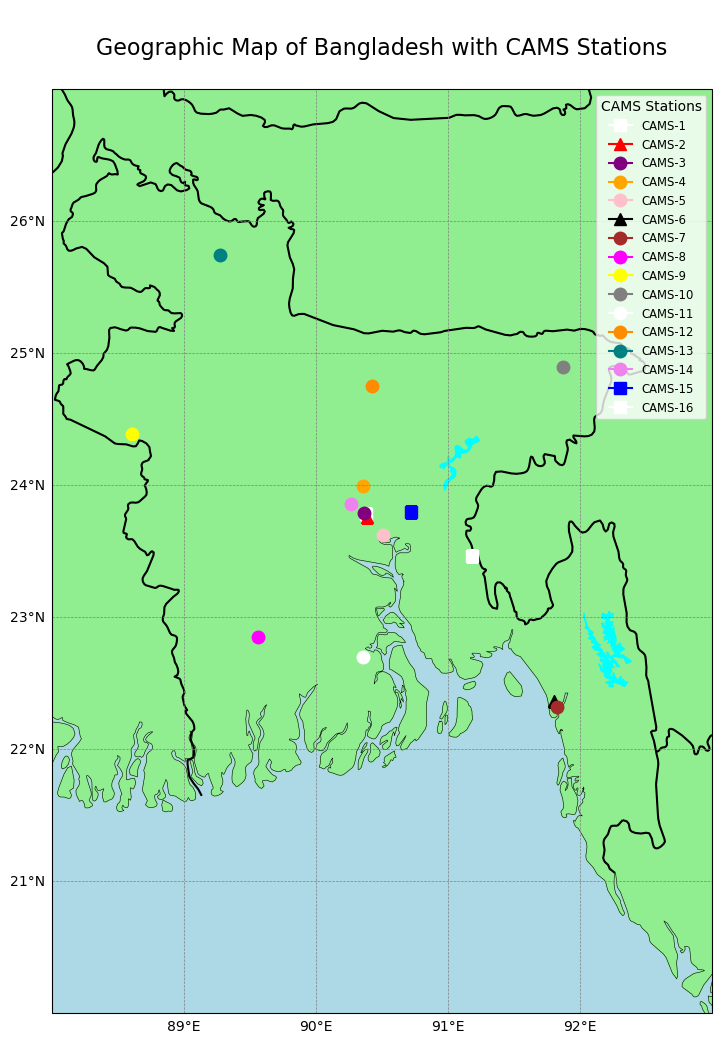

In [33]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Updated coordinates, names, markers, and colors for CAMS stations
stations = {
    "CAMS-1": {"name": "Dhaka, Dept of Environment", "lat": 23.7779, "lon": 90.3762, "marker": "s", "color": "white"},
    "CAMS-2": {"name": "Dhaka, Farmgate", "lat": 23.7594, "lon": 90.3868, "marker": "^", "color": "red"},
    "CAMS-3": {"name": "Dhaka, Darussalam", "lat": 23.788, "lon": 90.3608, "marker": "o", "color": "purple"},
    "CAMS-4": {"name": "Gazipur", "lat": 23.9914, "lon": 90.3541, "marker": "o", "color": "orange"},
    "CAMS-5": {"name": "Narayanganj", "lat": 23.6238, "lon": 90.5072, "marker": "o", "color": "pink"},
    "CAMS-6": {"name": "Chattogram, TV Station", "lat": 22.3644, "lon": 91.8045, "marker": "^", "color": "black"},
    "CAMS-7": {"name": "Chattogram, Agrabad", "lat": 22.3202, "lon": 91.8233, "marker": "o", "color": "brown"},
    "CAMS-8": {"name": "Khulna, Boyra", "lat": 22.8457, "lon": 89.5627, "marker": "o", "color": "magenta"},
    "CAMS-9": {"name": "Rajshahi, Sapura", "lat": 24.3833, "lon": 88.6033, "marker": "o", "color": "yellow"},
    "CAMS-10": {"name": "Sylhet, Red Crescent Campus", "lat": 24.8949, "lon": 91.8687, "marker": "o", "color": "gray"},
    "CAMS-11": {"name": "Barishal, DFO Office Campus", "lat": 22.701, "lon": 90.3541, "marker": "o", "color": "white"},
    "CAMS-12": {"name": "Mymensingh, DoE Office", "lat": 24.7471, "lon": 90.4203, "marker": "o", "color": "darkorange"},
    "CAMS-13": {"name": "Rangpur, BTV Rangpur Station", "lat": 25.7439, "lon": 89.2752, "marker": "o", "color": "teal"},
    "CAMS-14": {"name": "Savar, Atomic Energy Research Institute", "lat": 23.8583, "lon": 90.2667, "marker": "o", "color": "violet"},
    "CAMS-15": {"name": "Narsingdi, Sadar Upazila Complex", "lat": 23.7924, "lon": 90.7189, "marker": "s", "color": "blue"},
    "CAMS-16": {"name": "Cumilla, Court Area", "lat": 23.4607, "lon": 91.1809, "marker": "s", "color": "white"}
}


# Create a figure and axes with Cartopy for the map projection
fig = plt.figure(figsize=(10, 12))
# Set up the map using Cartopy with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88, 93, 20, 27], crs=ccrs.PlateCarree())

# Add map features for a better appearance
ax.add_feature(cfeature.LAND, color='lightgreen')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.4) #1.2
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5) #1.2
ax.add_feature(cfeature.LAKES, color='aqua')

# Title for the map
ax.set_title("\nGeographic Map of Bangladesh with CAMS Stations\n", fontsize=16)

# Customize the map with green land color and borders
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='black')
ax.add_feature(cfeature.LAND, color='lightgreen')

# Plot each CAMS station with specified markers and colors
for station_id, info in stations.items():
    ax.plot(info["lon"], info["lat"], marker=info["marker"], color=info["color"], markersize=9, transform=ccrs.PlateCarree(), label=station_id)

# Create a legend with unique labels for CAMS stations
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc="upper right", title="CAMS Stations", fontsize="small", frameon=True)

# Add gridlines with latitude and longitude labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

# Display the plot
plt.show()



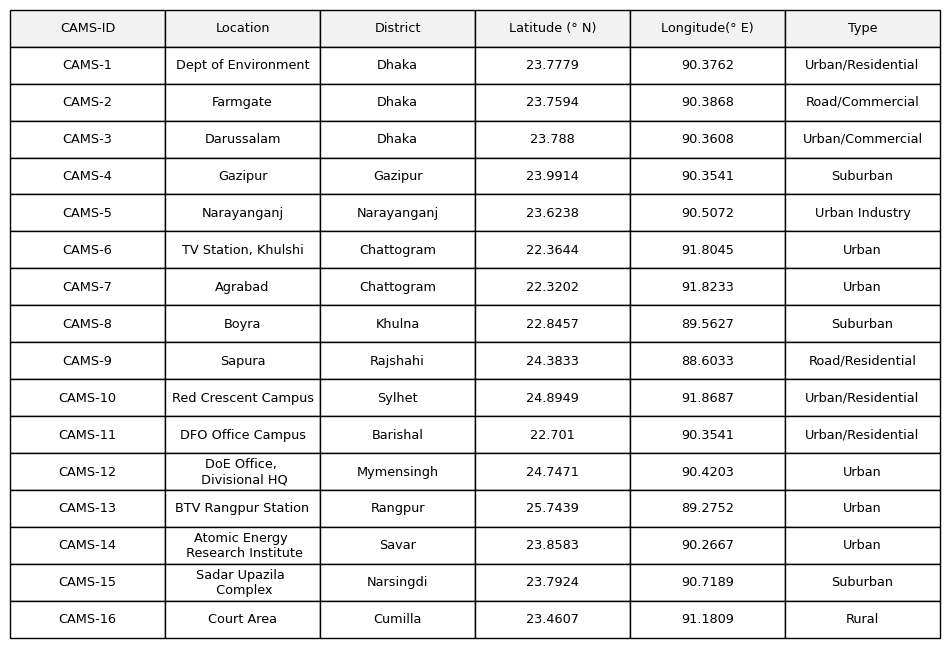

In [14]:
import matplotlib.pyplot as plt

# Updated CAMS station data with type
cams_data = {
    "CAMS-1": {"name": "Dept of Environment", "district": "Dhaka", "lat": 23.7779, "lon": 90.3762, "type": "Urban/Residential"},
    "CAMS-2": {"name": "Farmgate", "district": "Dhaka", "lat": 23.7594, "lon": 90.3868, "type": "Road/Commercial"},
    "CAMS-3": {"name": "Darussalam", "district": "Dhaka", "lat": 23.788, "lon": 90.3608, "type": "Urban/Commercial"},
    "CAMS-4": {"name": "Gazipur", "district": "Gazipur", "lat": 23.9914, "lon": 90.3541, "type": "Suburban"},
    "CAMS-5": {"name": "Narayanganj", "district": "Narayanganj", "lat": 23.6238, "lon": 90.5072, "type": "Urban Industry"},
    "CAMS-6": {"name": "TV Station, Khulshi", "district": "Chattogram", "lat": 22.3644, "lon": 91.8045, "type": "Urban"},
    "CAMS-7": {"name": "Agrabad", "district": "Chattogram", "lat": 22.3202, "lon": 91.8233, "type": "Urban"},
    "CAMS-8": {"name": "Boyra", "district": "Khulna", "lat": 22.8457, "lon": 89.5627, "type": "Suburban"},
    "CAMS-9": {"name": "Sapura", "district": "Rajshahi", "lat": 24.3833, "lon": 88.6033, "type": "Road/Residential"},
    "CAMS-10": {"name": "Red Crescent Campus", "district": "Sylhet", "lat": 24.8949, "lon": 91.8687, "type": "Urban/Residential"},
    "CAMS-11": {"name": "DFO Office Campus", "district": "Barishal", "lat": 22.701, "lon": 90.3541, "type": "Urban/Residential"},
    "CAMS-12": {"name": "DoE Office, \n Divisional HQ", "district": "Mymensingh", "lat": 24.7471, "lon": 90.4203, "type": "Urban"},
    "CAMS-13": {"name": "BTV Rangpur Station", "district": "Rangpur", "lat": 25.7439, "lon": 89.2752, "type": "Urban"},
    "CAMS-14": {"name": "Atomic Energy \n Research Institute", "district": "Savar", "lat": 23.8583, "lon": 90.2667, "type": "Urban"},
    "CAMS-15": {"name": "Sadar Upazila \n Complex", "district": "Narsingdi", "lat": 23.7924, "lon": 90.7189, "type": "Suburban"},
    "CAMS-16": {"name": "Court Area", "district": "Cumilla", "lat": 23.4607, "lon": 91.1809, "type": "Rural"}
}

# Set up figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Create table content with the new layout
table_data = []
for cam_id, info in cams_data.items():
    table_data.append([
        cam_id,
        info["name"],
        info["district"],
        info["lat"],
        info["lon"],
        info["type"]
    ])

# Column headers with updated names
col_labels = ["CAMS-ID", "Location", "District", "Latitude (° N)", "Longitude(° E)", "Type"]

# Add table to the figure
table = ax.table(cellText=table_data, colLabels=col_labels, cellLoc="center", loc="center", colColours=["#f2f2f2"] * 6)

# Style the table to fit content
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)  # Reduced the row height for compactness

# Adjust cell alignment and width
for i in range(len(table_data) + 1):  # +1 for header row
    for j in range(6):
        table[i, j].set_height(0.06)  # Control row height for compactness
        table[i, j].set_fontsize(9.25)  # Uniform font size

plt.show()


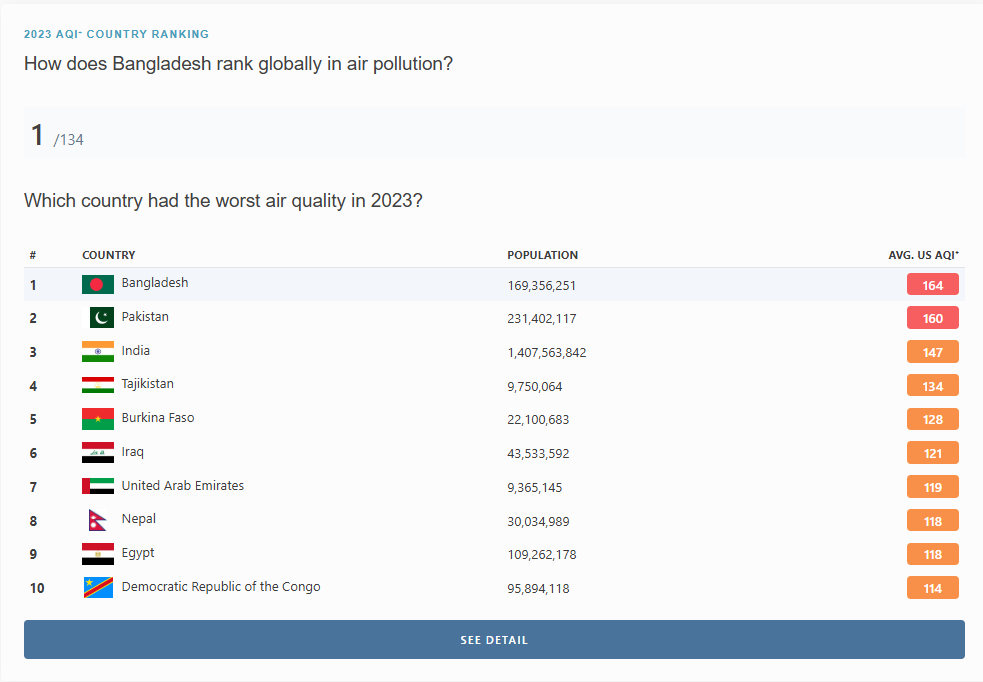

In [15]:
import pandas as pd

file_path = "C:\\Users\\Acer\\Downloads\\fahim_vai - Sheet1 (9).csv"

try:
  df = pd.read_csv(file_path)
  df.head()
except FileNotFoundError:
  print(f"File not found at: {file_path}")

In [16]:
df.head()

Date         City  AQI Responsible Pollutant AQI Category  \
0  11/12/2024        Dhaka  165                 PM2.5    UNHEALTHY   
1  11/12/2024   Chattogram  DNA                   DNA          DNA   
2  11/12/2024      Gazipur  167                 PM2.5    UNHEALTHY   
3  11/12/2024  Narayanganj  191                 PM2.5    UNHEALTHY   
4  11/12/2024       Sylhet   97                 PM2.5     MODERATE   

             Comments  
0  AQI Range: 155-174  
1                 DNA  
2                 NaN  
3                 NaN  
4                 NaN

In [17]:
def check_date_format(df):
    # Define the regex pattern for MM/DD/YYYY
    pattern = r'^\d{2}/\d{2}/\d{4}$'

    # Check which rows match the format
    correct_format = df['Date'].str.match(pattern)

    # Display the rows that do not match the pattern
    if correct_format.all():
        print("All dates are in MM/DD/YYYY format")
    else:
        print("The following dates are not in the correct format:")
        print(df[~correct_format]['Date'])


check_date_format(df)

The following dates are not in the correct format:
39     11/9/2024
40     11/9/2024
41     11/9/2024
42     11/9/2024
43     11/9/2024
         ...    
502    10/5/2024
503    10/5/2024
504    10/5/2024
505    10/5/2024
506    10/5/2024
Name: Date, Length: 130, dtype: object


In [18]:
# Function to add leading zeros to dates
def format_date(date_str):
    # Split the date string by '/'
    parts = date_str.split('/')

    # Ensure month and day are 2 digits
    month = parts[0].zfill(2)  # Adds leading zero if month is 1 digit
    day = parts[1].zfill(2)    # Adds leading zero if day is 1 digit
    year = parts[2]            # Year remains unchanged

    # Return the date in MM/DD/YYYY format
    return f"{month}/{day}/{year}"

# Apply the formatting function to the entire 'Date' column
def fix_date_column(df):
    df['Date'] = df['Date'].apply(format_date)
    return df


df = fix_date_column(df)


def check_date_format(df):
    # Define the regex pattern for MM/DD/YYYY
    pattern = r'^\d{2}/\d{2}/\d{4}$'

    # Check which rows match the format
    correct_format = df['Date'].str.match(pattern)

    # Display the rows that do not match the pattern
    if correct_format.all():
        print("All dates are in MM/DD/YYYY format")
    else:
        print("The following dates are not in the correct format:")
        print(df[~correct_format]['Date'])


check_date_format(df)


All dates are in MM/DD/YYYY format


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose

register_matplotlib_converters()

In [20]:
df.shape

(7251, 6)

In [21]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sort the data by Date for correct plotting
df = df.sort_values(by='Date')

# Filter out rows where AQI is not available (if needed)
df = df[df['AQI'] != 'DNA']
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

In [22]:
# Get unique values in the 'City' column
unique_cities = df['City'].unique()

# Print the unique cities
print("Unique cities in the dataset:")
for city in unique_cities:
    print(city)

Unique cities in the dataset:
Norshindi
Dhaka
Chittgong
Gazipur
Narayangonj
Cumilla
Rajshahi
Barisal
Savar
Mymensingh
Rangpur
Khulna
Sylhet
Chittagong
Narayanganj
Narsingdi
Chattogram
Narshindi
Barishal
Narsindi


In [23]:
import pandas as pd

# Dictionary of correct city names mapping to incorrect ones
city_corrections = {
    'Narsingdi': ['Norshindi', 'Narshindi', 'Narsindi'],
    'Chittagong': ['Chittgong', 'Chattogram'],
    'Narayanganj': ['Narayangonj'],
    'Barishal': ['Barisal']
}

# Replace the incorrect city names with the correct ones
for correct_city, wrong_cities in city_corrections.items():
    df['City'] = df['City'].replace(wrong_cities, correct_city)

# Print the unique cities after corrections
unique_cities_after_correction = df['City'].unique()
print("Unique cities after correction:")
for city in unique_cities_after_correction:
    print(city)


Unique cities after correction:
Narsingdi
Dhaka
Chittagong
Gazipur
Narayanganj
Cumilla
Rajshahi
Barishal
Savar
Mymensingh
Rangpur
Khulna
Sylhet


In [24]:
df.head()

Date         City  AQI Responsible Pollutant    AQI Category  \
7250 2023-02-13    Narsingdi  169                  PM10       UNHEALTHY   
7238 2023-02-13        Dhaka  152                 PM2.5       UNHEALTHY   
7239 2023-02-13   Chittagong  145                 PM2.5         CAUTION   
7240 2023-02-13      Gazipur  216                 PM2.5  VERY UNHEALTHY   
7241 2023-02-13  Narayanganj  193                 PM2.5       UNHEALTHY   

     Comments  
7250      NaN  
7238      NaN  
7239      NaN  
7240      NaN  
7241      NaN

In [25]:
df.shape

(6467, 6)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6467 entries, 7250 to 0
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   6467 non-null   datetime64[ns]
 1   City                   6467 non-null   object        
 2   AQI                    6467 non-null   int64         
 3   Responsible Pollutant  6467 non-null   object        
 4   AQI Category           6467 non-null   object        
 5   Comments               754 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 353.7+ KB


In [27]:
df.describe()

Date          AQI
count                           6467  6467.000000
mean   2024-01-20 08:37:02.235966976   136.311273
min              2023-02-13 00:00:00     0.000000
25%              2023-09-08 00:00:00    84.000000
50%              2024-01-21 00:00:00   140.000000
75%              2024-06-09 00:00:00   176.000000
max              2024-11-12 00:00:00   419.000000
std                              NaN    62.504221

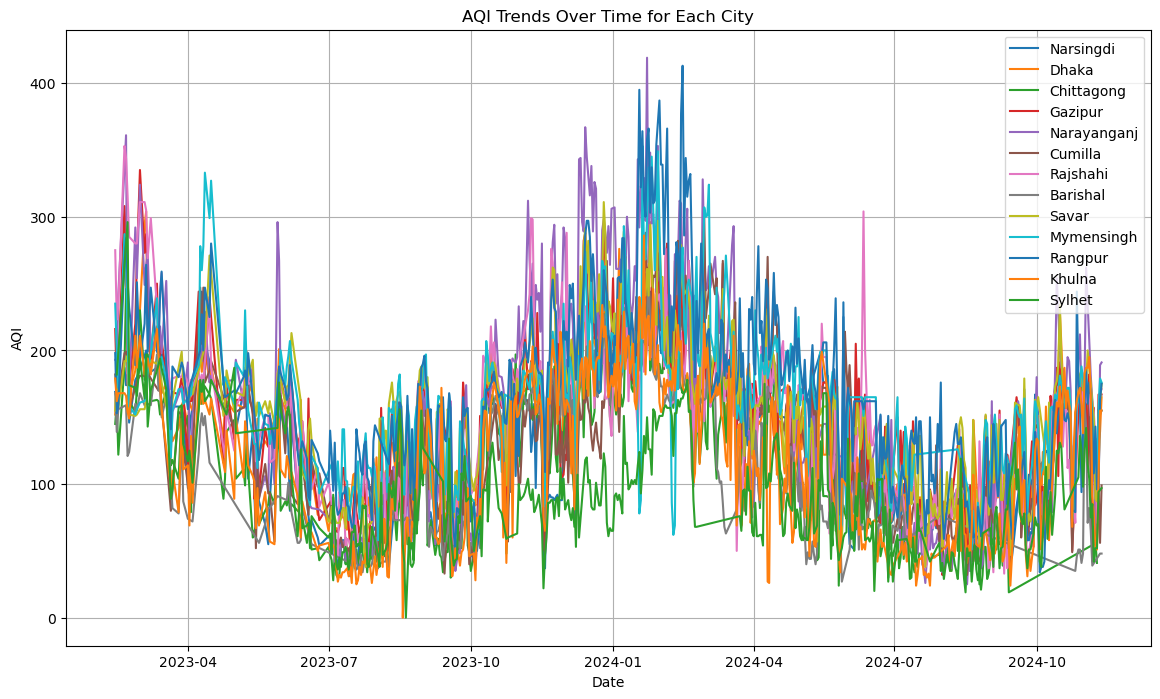

In [28]:
# Plot AQI trends for each city
plt.figure(figsize=(14, 8)) #14 8
cities = df['City'].unique()

for city in cities:
    city_data = df[df['City'] == city]
    plt.plot(city_data['Date'], city_data['AQI'], label=city)

plt.title('AQI Trends Over Time for Each City')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


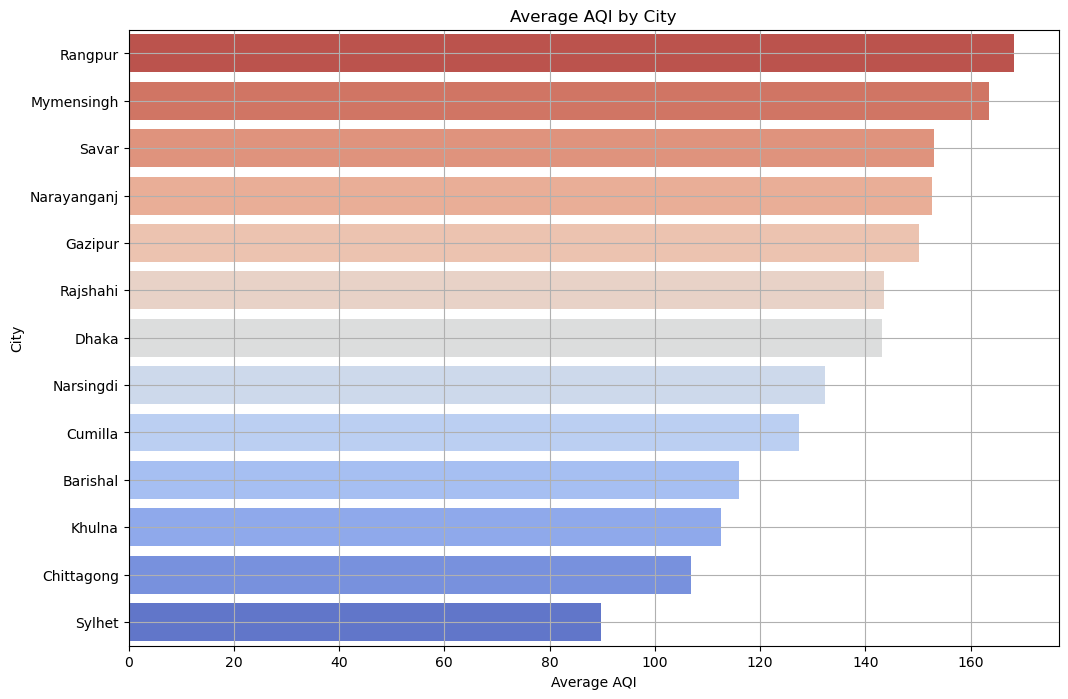

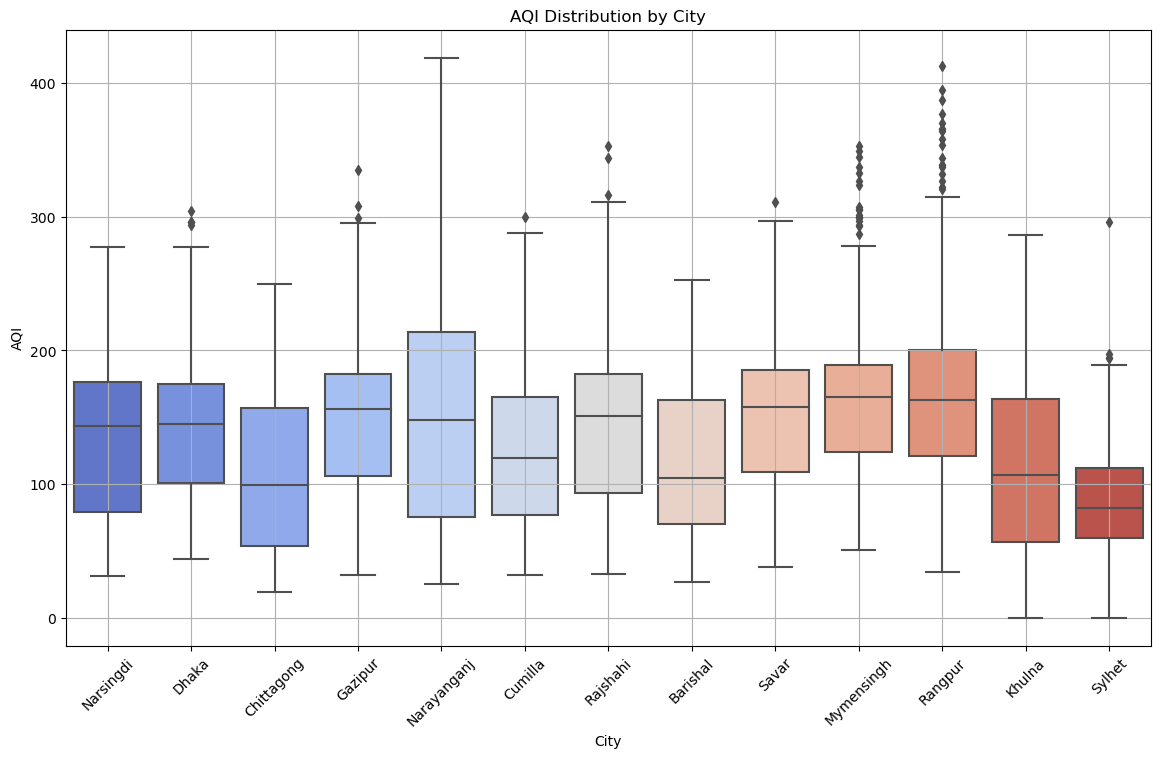

In [29]:
# Group by City to calculate average AQI per city
city_aqi_avg = df.groupby('City')['AQI'].mean().sort_values(ascending=False)

# Plotting the average AQI for each city
plt.figure(figsize=(12, 8))
sns.barplot(x=city_aqi_avg.values, y=city_aqi_avg.index, palette='coolwarm_r')
plt.title('Average AQI by City')
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.grid(True)
plt.show()


# Bar Plot (Average AQI by City):
# This plot shows the average AQI for each city.
# The cities at the top of the bar chart have higher average AQI, meaning their air quality is generally worse.
# The cities at the bottom have a lower average AQI, indicating better air quality.
# What you can learn:

# Which cities have the worst air pollution.
# Which cities have relatively better air quality.
# This gives a quick overview of air pollution trends across all cities.


# Boxplot for AQI distribution by city
plt.figure(figsize=(14, 8))
sns.boxplot(x='City', y='AQI', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('AQI Distribution by City')
plt.grid(True)
plt.show()

# Box Plot (AQI Distribution by City):
# This plot shows the distribution of AQI values for each city.
# The box represents the middle 50% of the AQI values, while the lines (called "whiskers") show the range of AQI values.
# Outliers (extreme AQI values) might appear as dots outside the whiskers.
# What you can learn:

# How spread out the AQI values are for each city. A tall box or long whiskers mean AQI values fluctuate a lot.
# If a city has many outliers, it suggests that sometimes the air quality gets much worse than usual.
# You can also compare how AQI varies between cities. Cities with narrower boxes have more consistent air quality, while wider boxes indicate more variability.


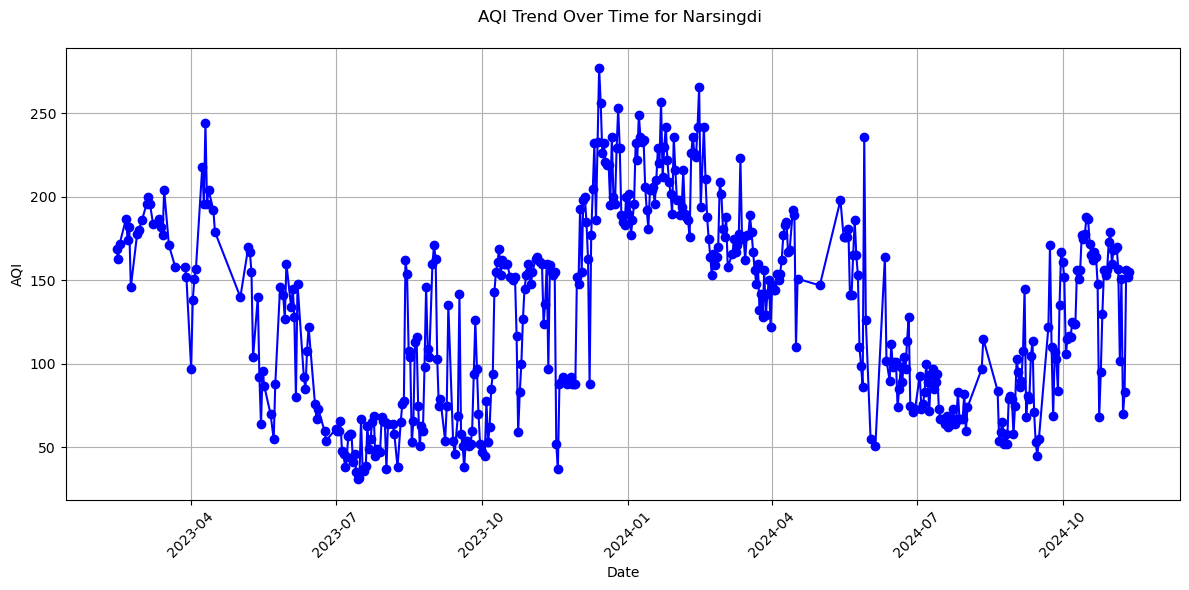

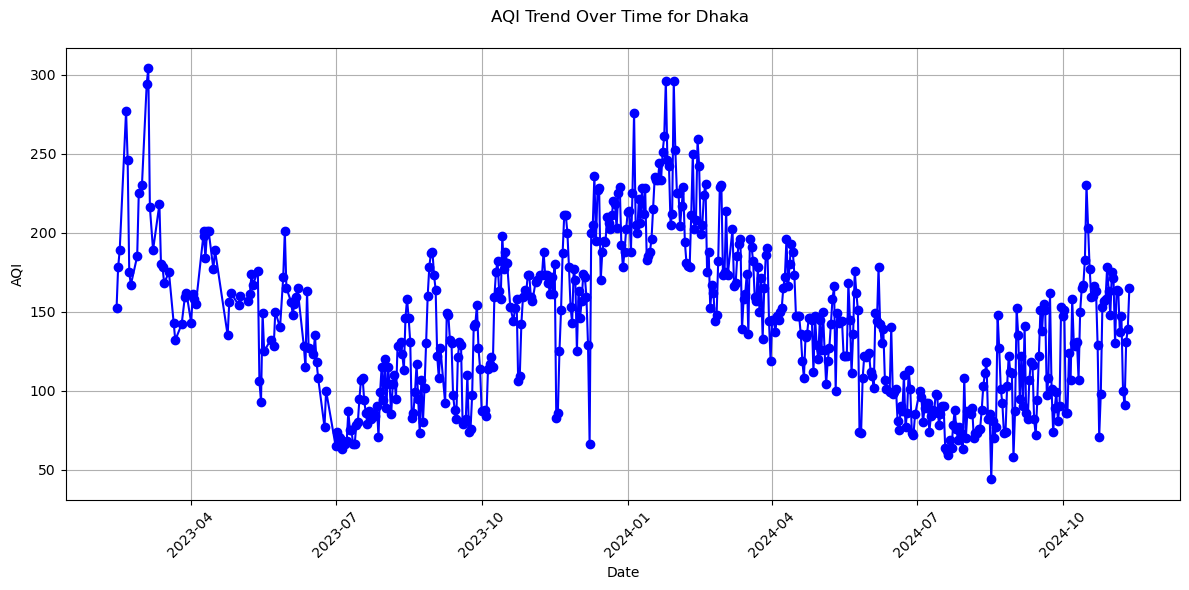

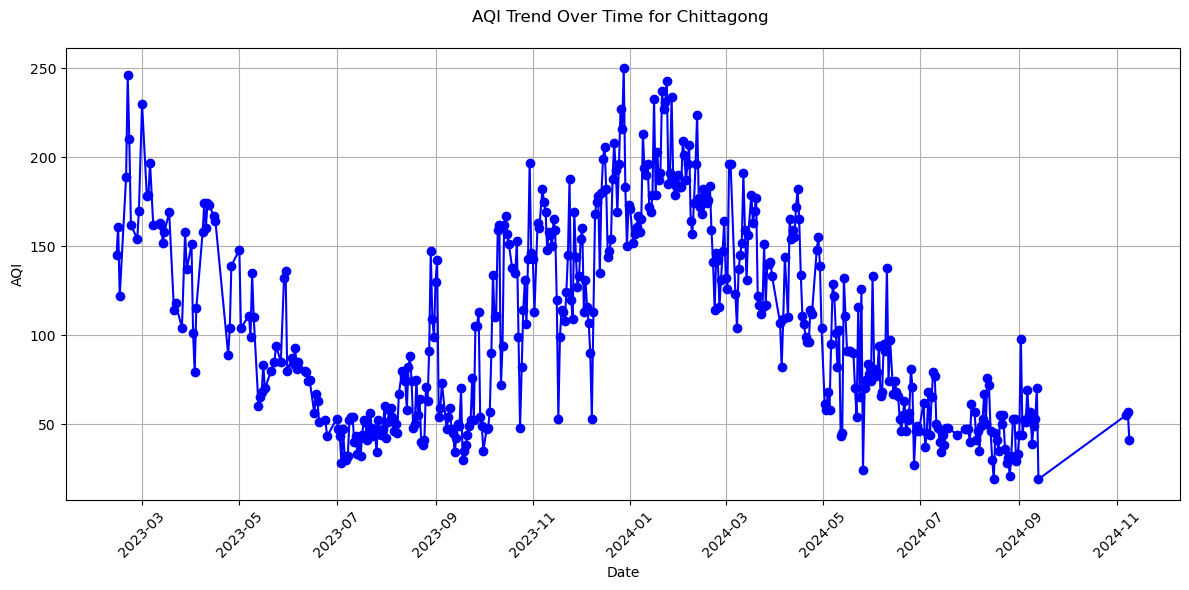

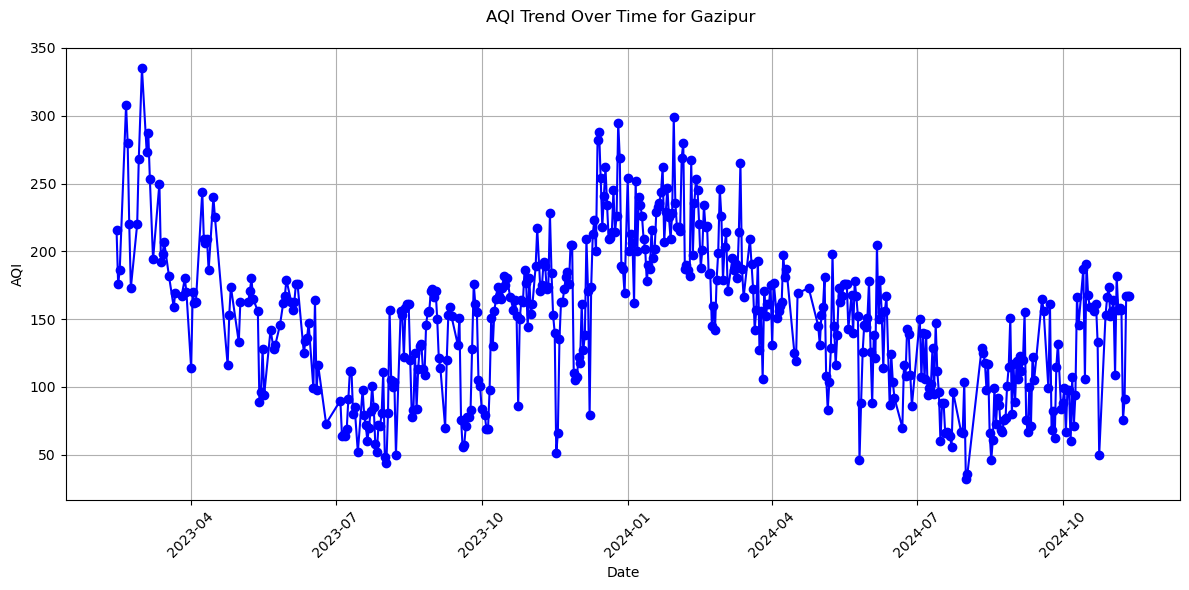

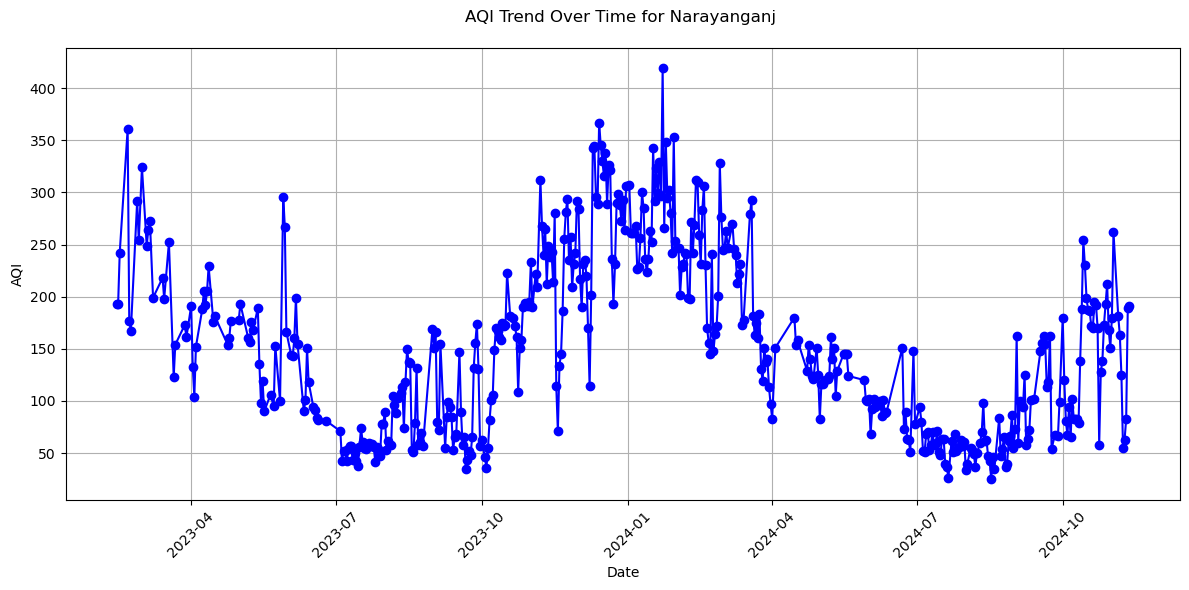

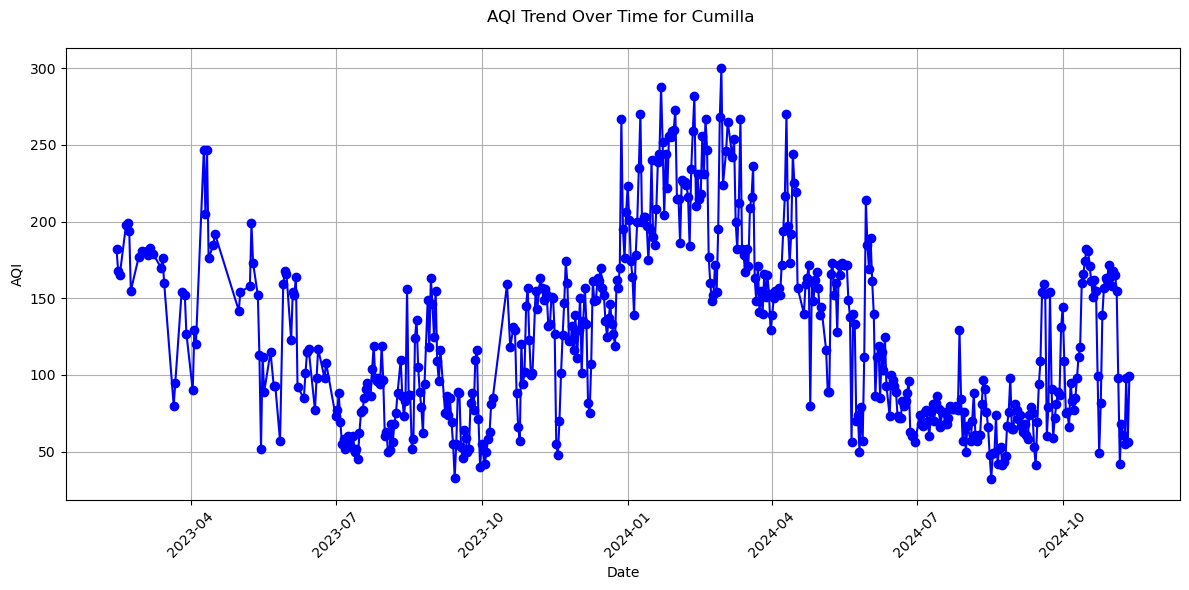

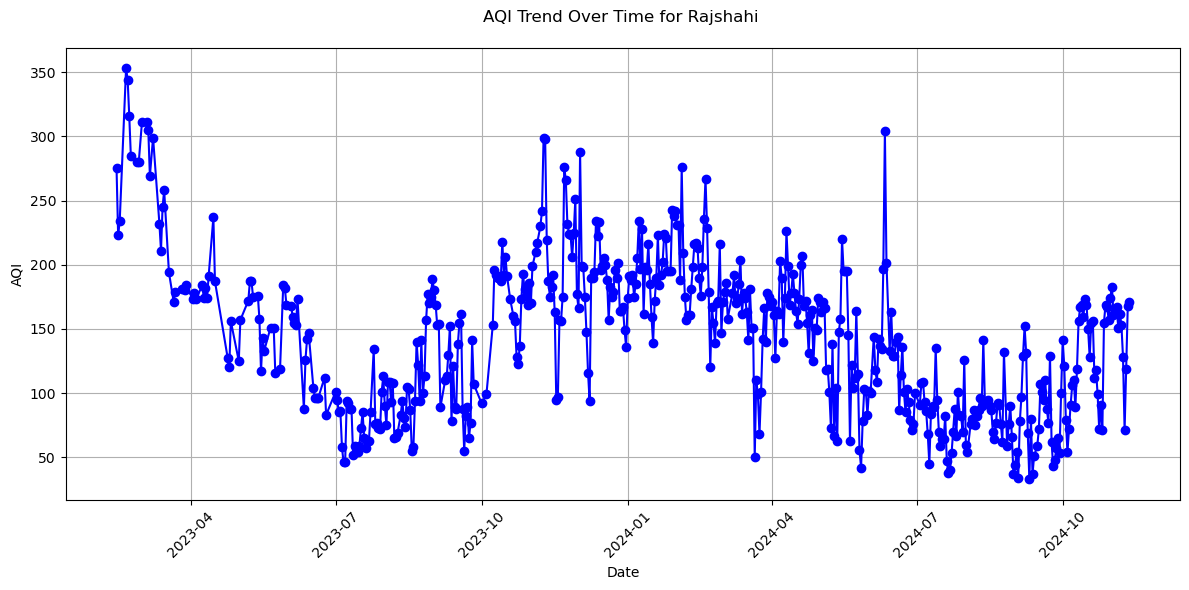

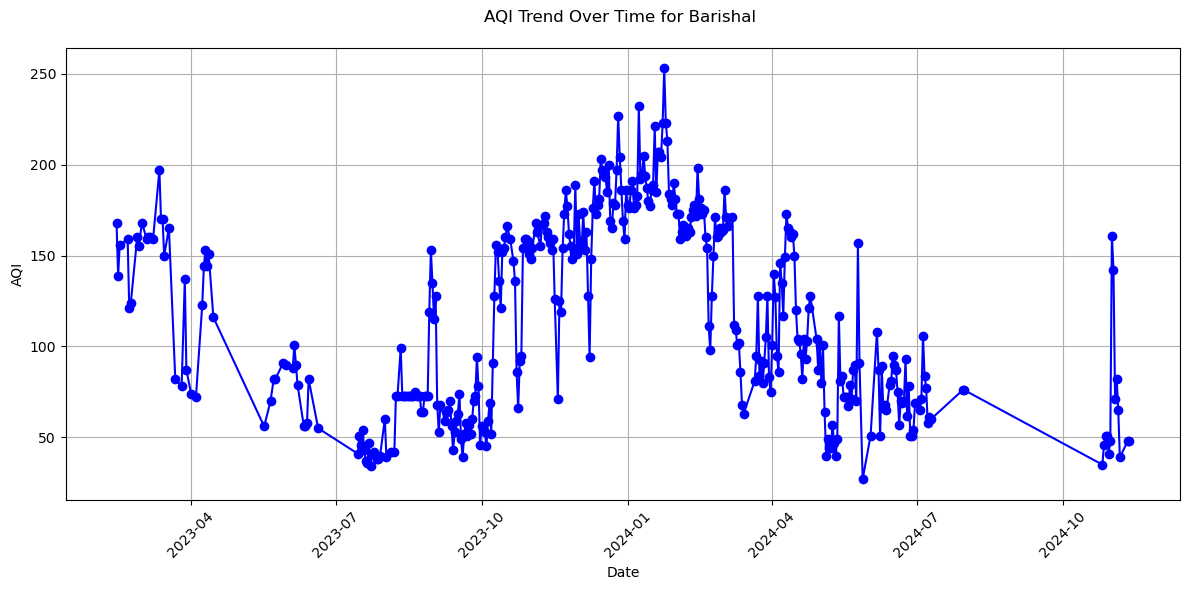

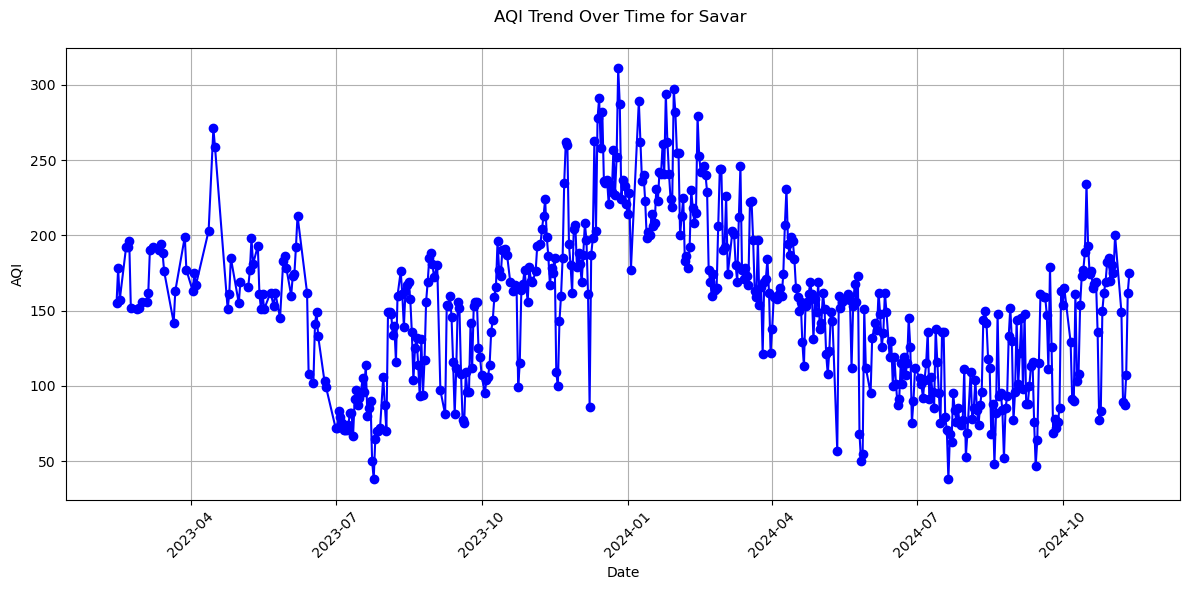

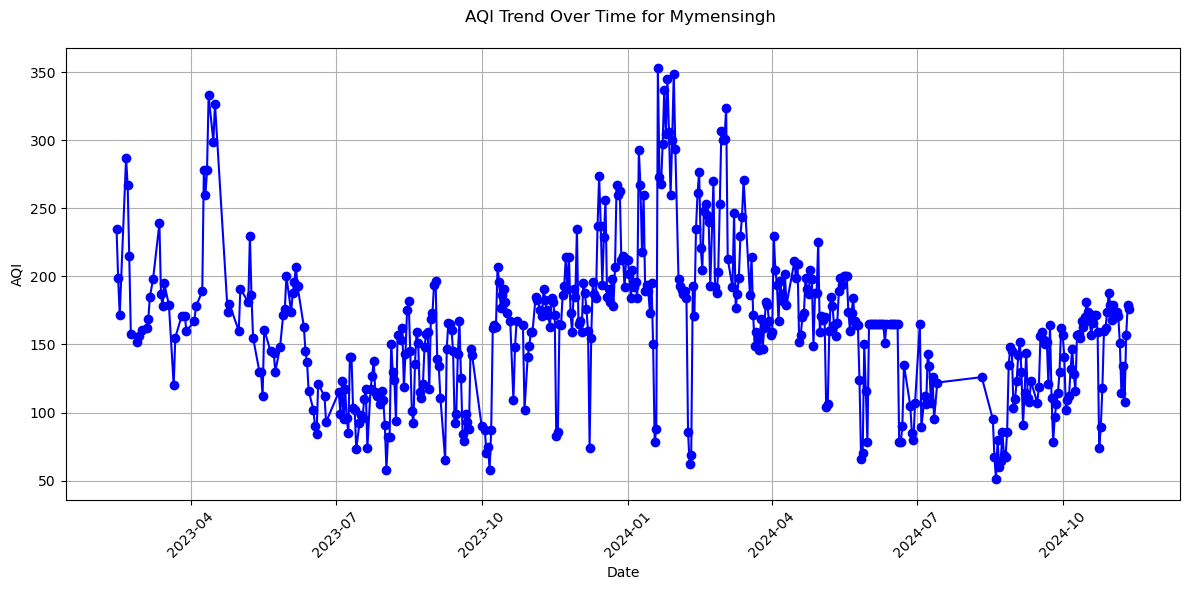

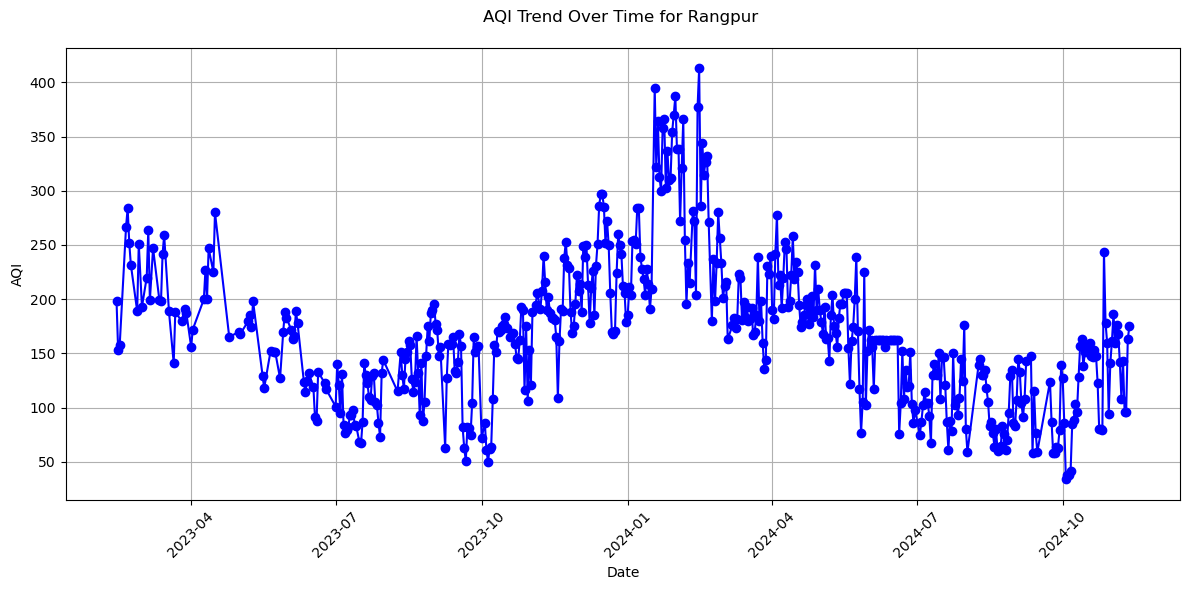

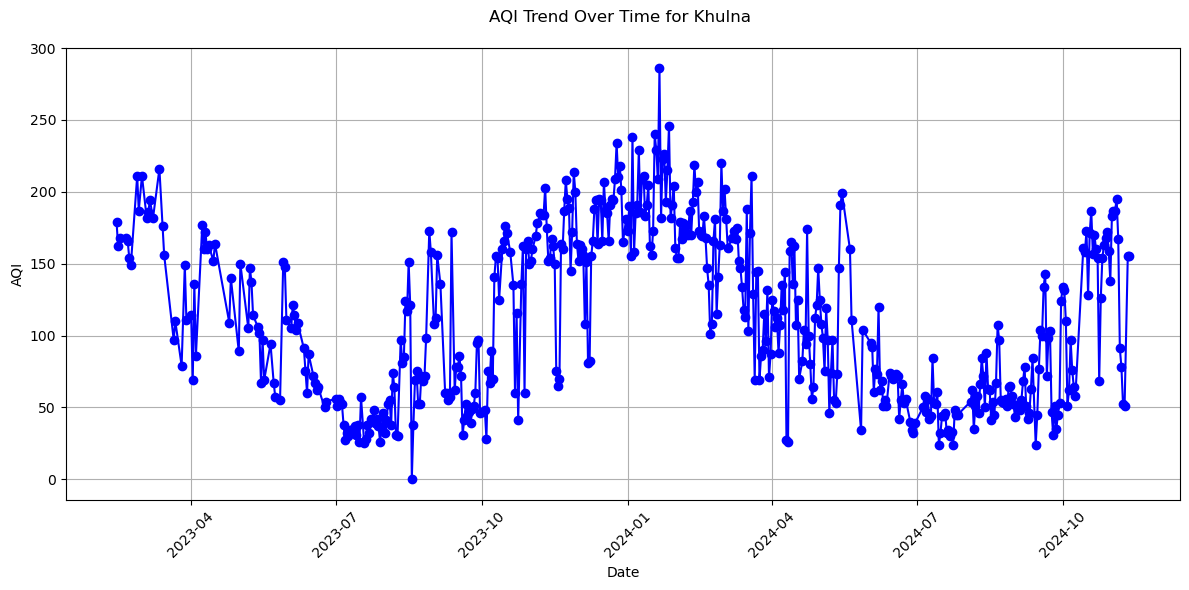

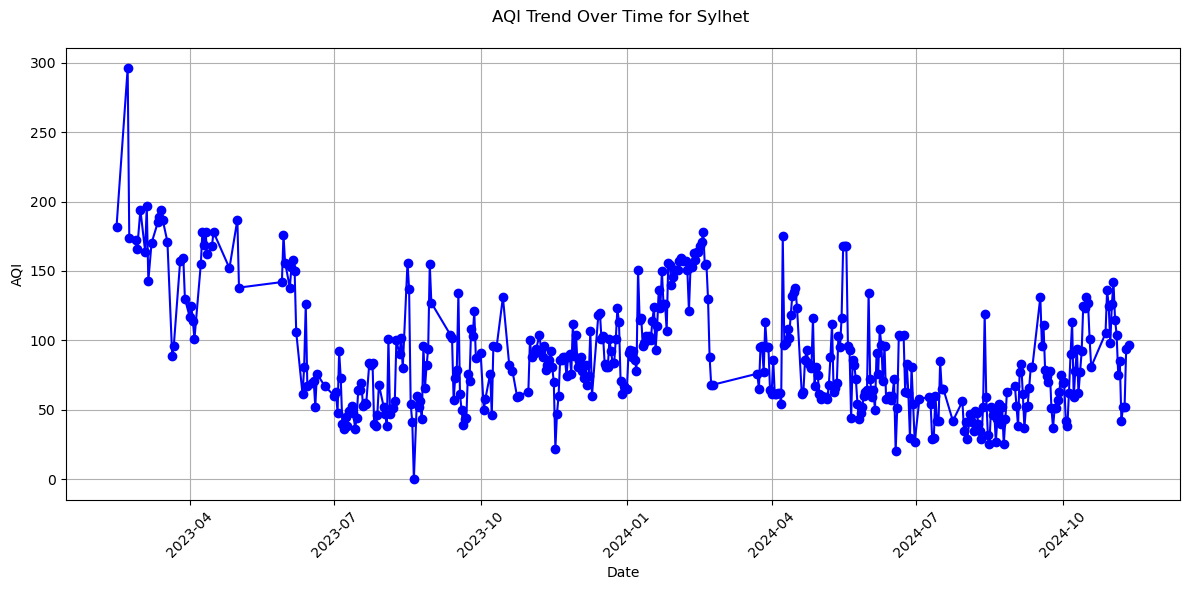

In [30]:
# Loop through each city and create individual plots for AQI trends
cities = df['City'].unique()

for city in cities:
    plt.figure(figsize=(12, 6))
    city_data = df[df['City'] == city]

    plt.plot(city_data['Date'], city_data['AQI'], label=city, color='b', marker='o')
    plt.title(f'AQI Trend Over Time for {city} \n')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.grid(True)

    #Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


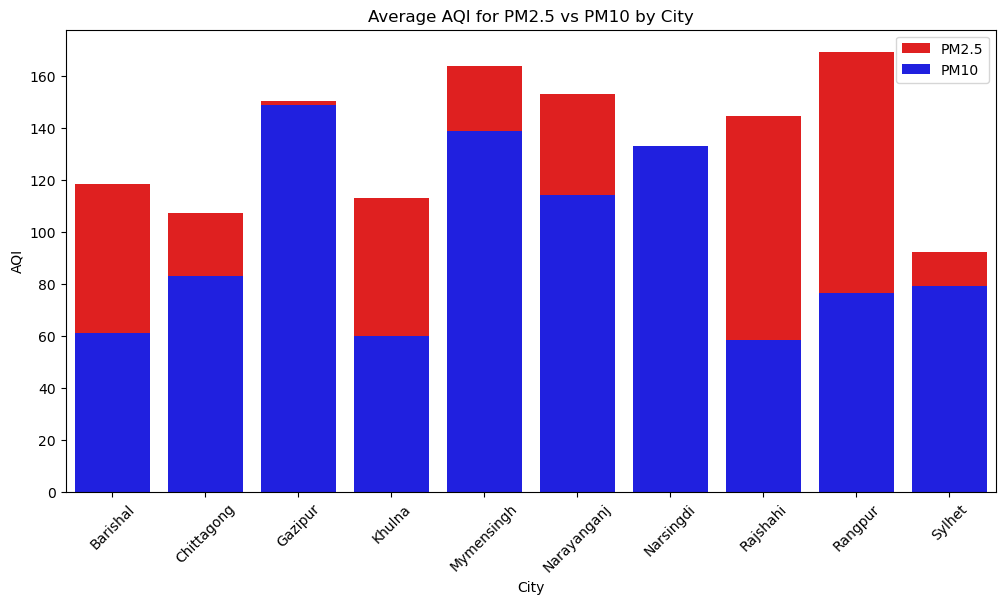

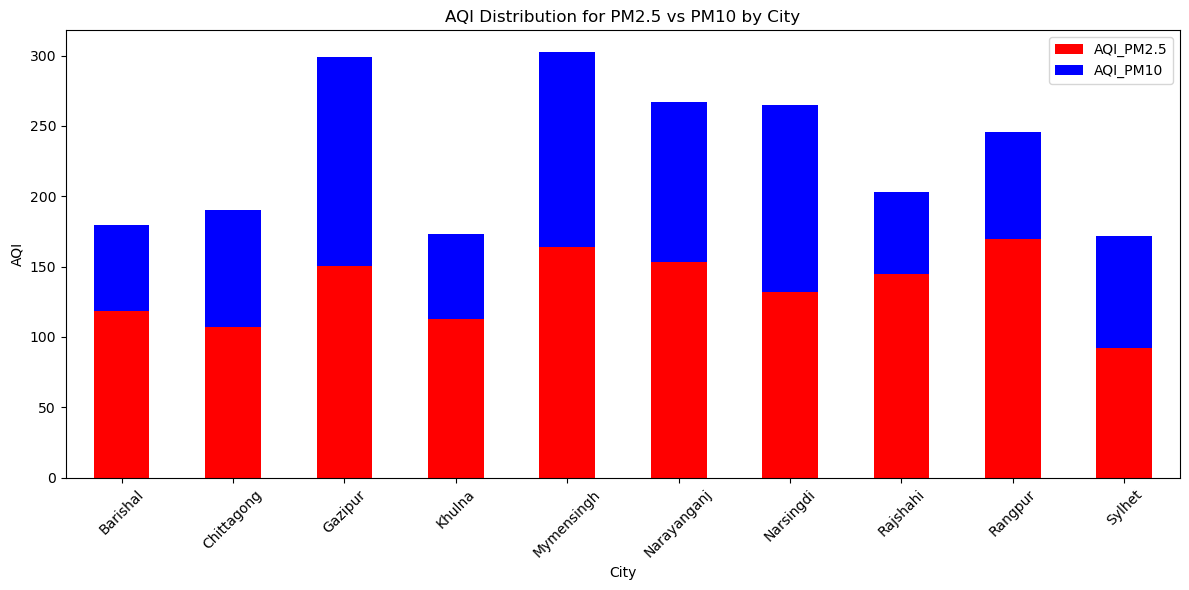

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for PM2.5 and PM10
pm25_data = df[df['Responsible Pollutant'] == 'PM2.5']
pm10_data = df[df['Responsible Pollutant'] == 'PM10']

# Group data by city and calculate the mean AQI for PM2.5 and PM10
pm25_avg = pm25_data.groupby('City')['AQI'].mean().reset_index()
pm10_avg = pm10_data.groupby('City')['AQI'].mean().reset_index()

# Merge both datasets for comparison
city_avg = pd.merge(pm25_avg, pm10_avg, on='City', suffixes=('_PM2.5', '_PM10'))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='AQI_PM2.5', data=city_avg, color='red', label='PM2.5')
sns.barplot(x='City', y='AQI_PM10', data=city_avg, color='blue', label='PM10')

plt.title('Average AQI for PM2.5 vs PM10 by City')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend()
plt.show()



# Plot stacked bar plot for AQI from PM2.5 and PM10 per city
city_avg.set_index('City')[['AQI_PM2.5', 'AQI_PM10']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'blue'])

plt.title('AQI Distribution for PM2.5 vs PM10 by City')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Processing: Narsingdi


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

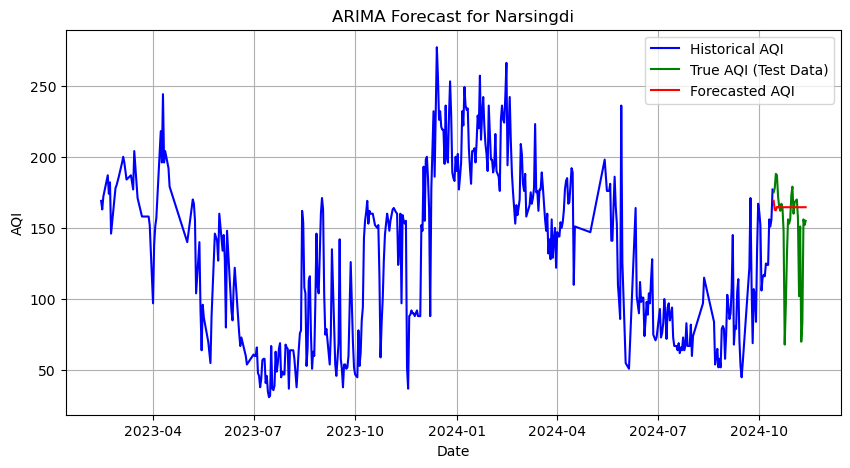


Processing: Dhaka


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

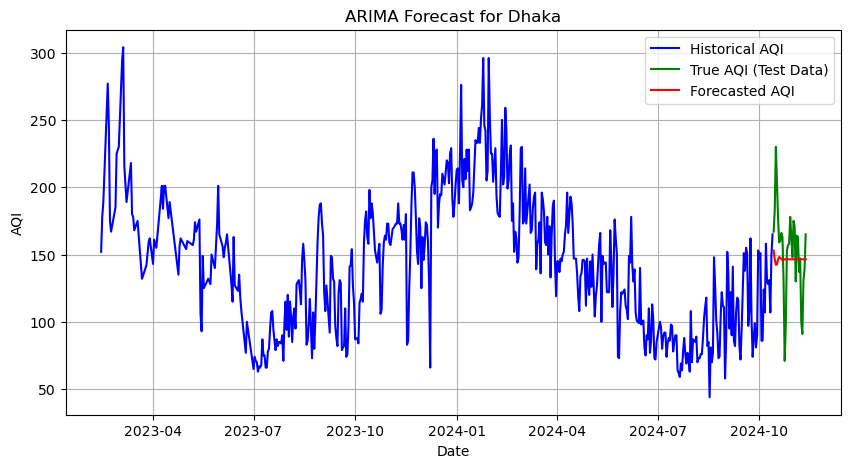


Processing: Chittagong


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

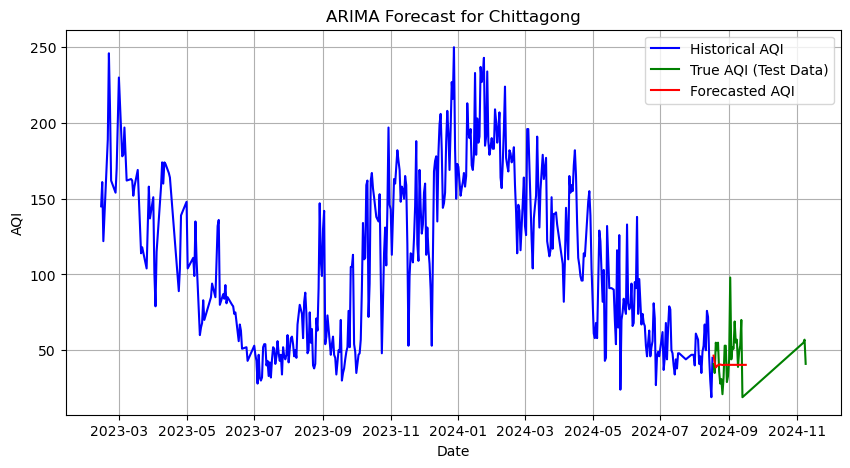


Processing: Gazipur


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

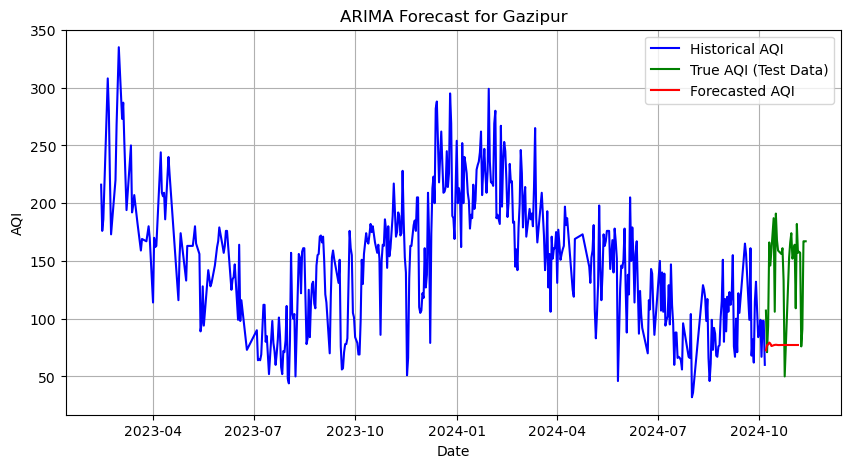


Processing: Narayanganj


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

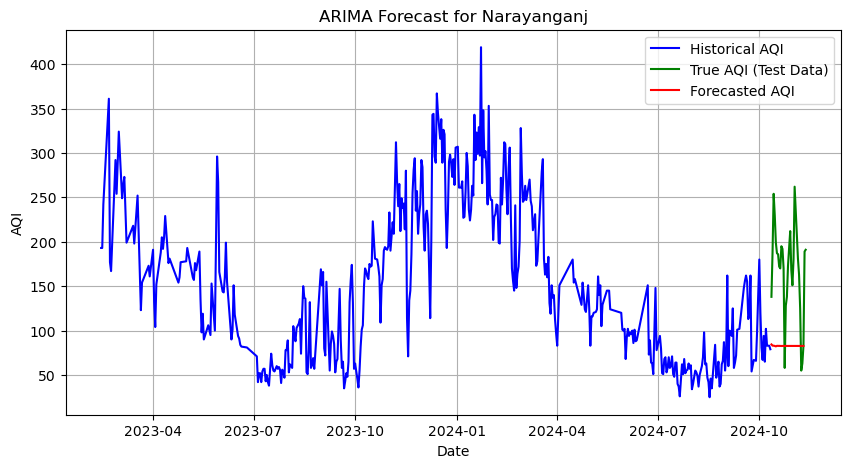


Processing: Cumilla


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

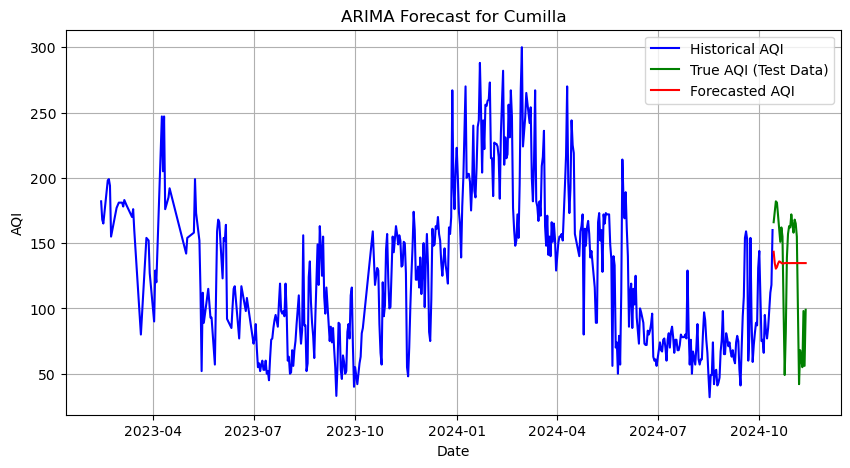


Processing: Rajshahi


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

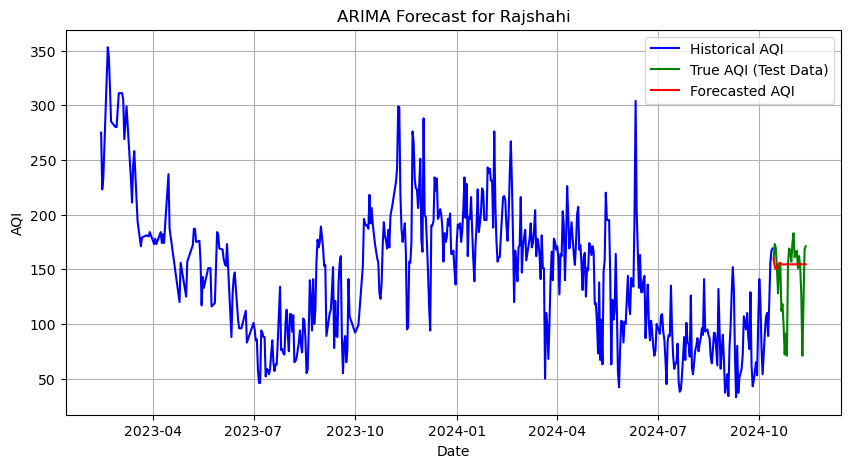


Processing: Barishal


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

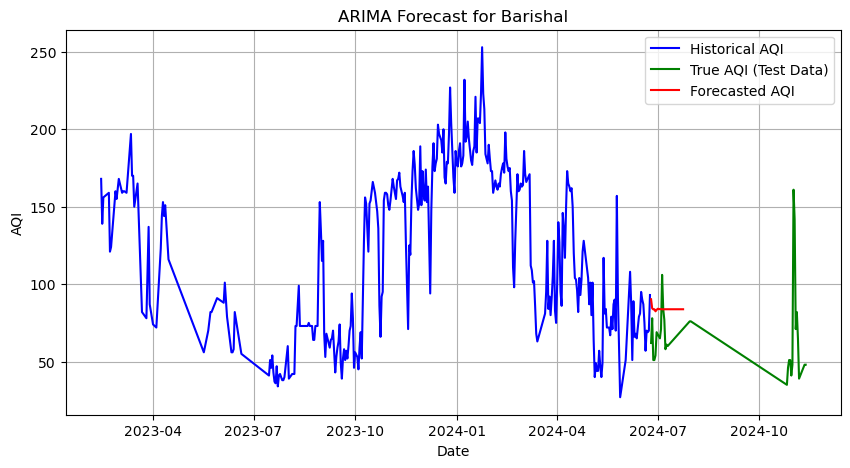


Processing: Savar


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

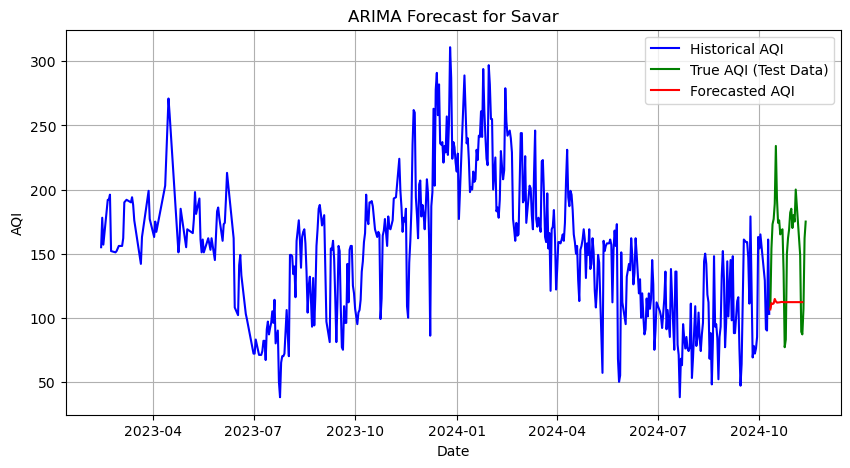


Processing: Mymensingh


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

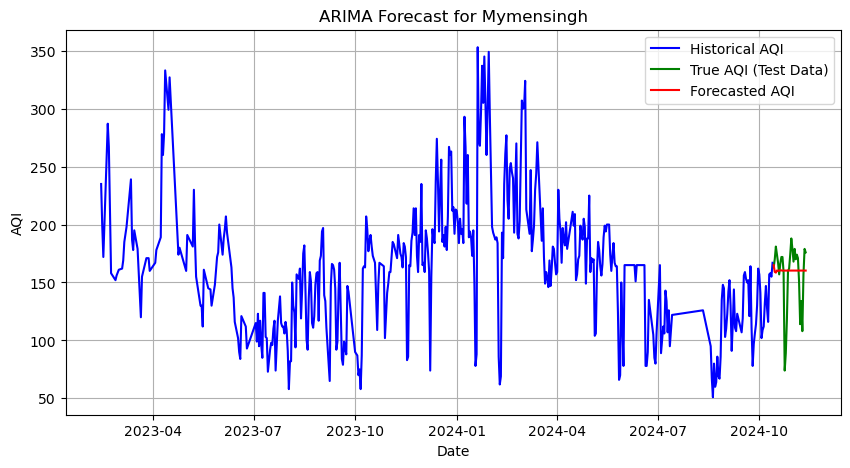


Processing: Rangpur


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

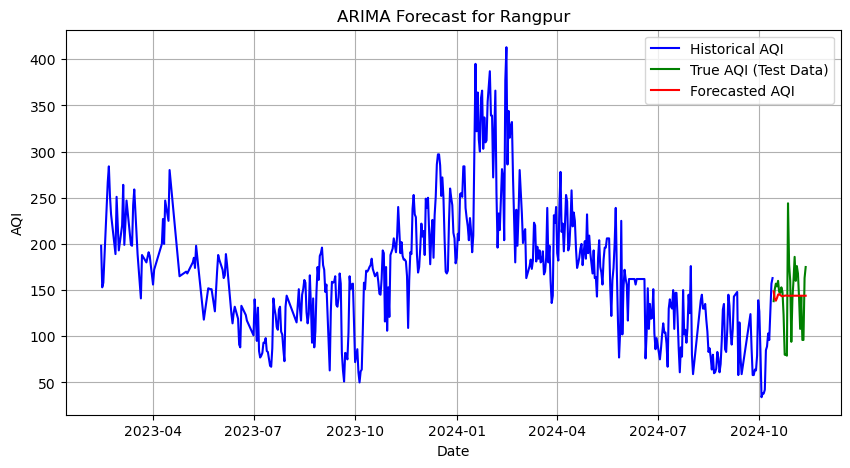


Processing: Khulna


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

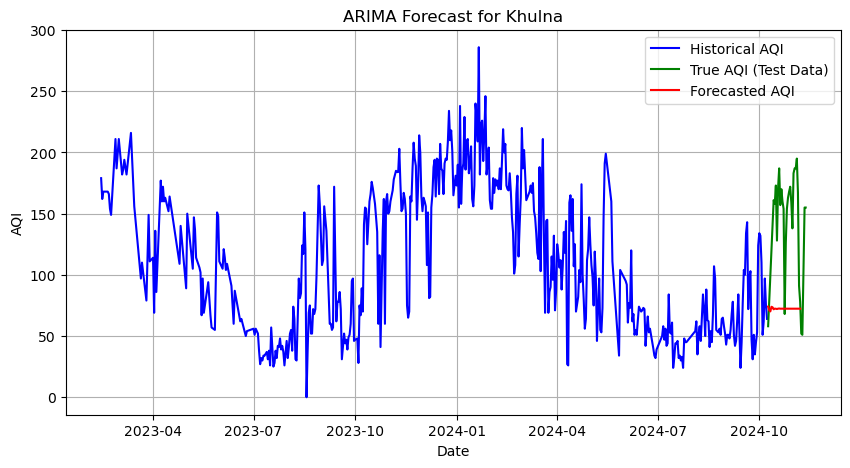


Processing: Sylhet


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

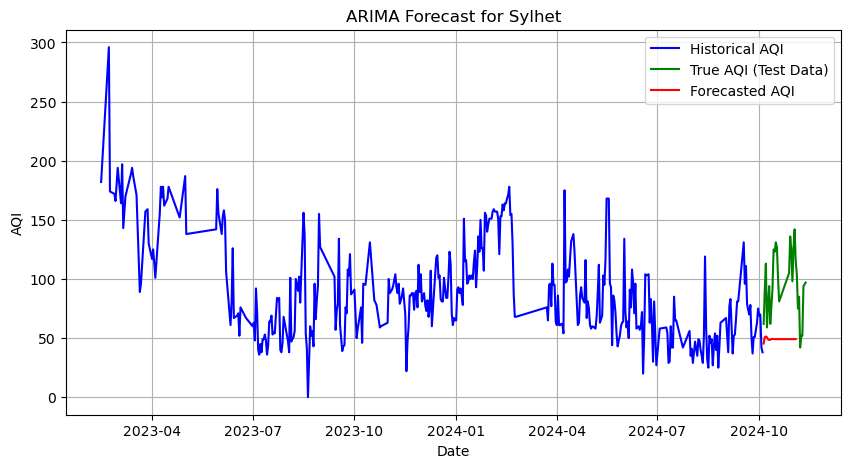


Processing: PM10


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

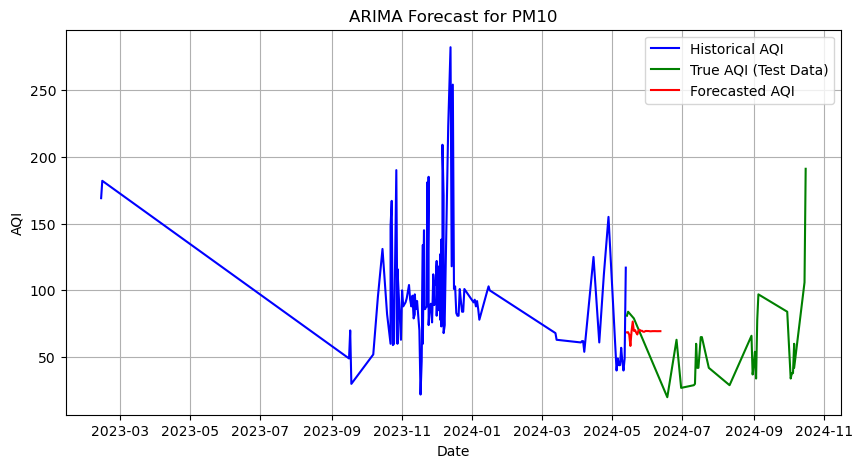


Processing: PM2.5


C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

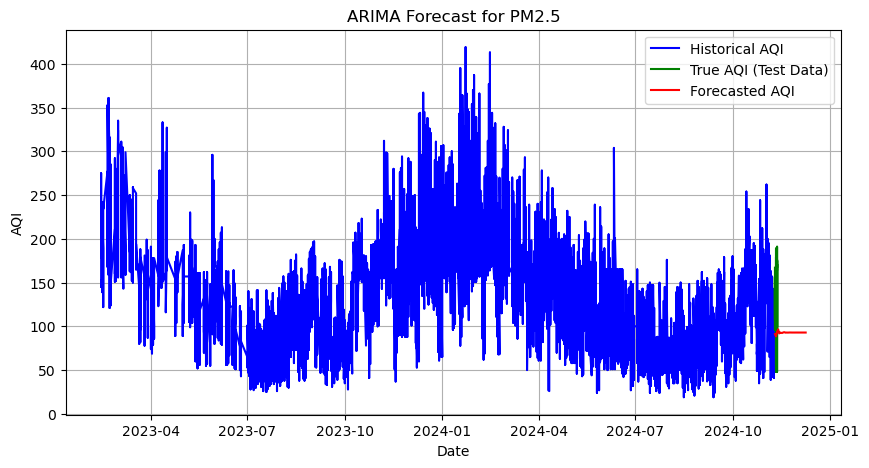


Processing: DNA
Skipping DNA due to insufficient data


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Function to apply ARIMA and forecast for each group (city or pollutant)
def apply_arima_and_forecast(df, group_by_column, forecast_steps=30):
    unique_groups = df[group_by_column].unique()

    # Loop through each city or pollutant
    for group in unique_groups:
        print(f"\nProcessing: {group}")

        # Filter data for the current group (city or pollutant)
        df_group = df[df[group_by_column] == group].copy()

        # Set 'Date' as the index and sort it
        df_group.set_index('Date', inplace=True)
        df_group = df_group.sort_index()

        # Ensure AQI column is numeric (if not already)
        df_group['AQI'] = pd.to_numeric(df_group['AQI'], errors='coerce')

        # Drop rows with missing AQI values
        df_group = df_group.dropna(subset=['AQI'])

        # Check if the group has enough data points for ARIMA modeling
        if len(df_group) < 10 + forecast_steps:
            print(f"Skipping {group} due to insufficient data")
            continue

        # Split the data into training and test sets
        train = df_group.iloc[:-forecast_steps]
        test = df_group.iloc[-forecast_steps:]

        # Apply ARIMA model (use a simple (5, 1, 0) order, can be tuned)
        model = ARIMA(train['AQI'], order=(5, 1, 0))
        model_fit = model.fit()

        # Forecast the next 'forecast_steps' days
        forecast = model_fit.forecast(steps=forecast_steps)

        # Create a date range for the forecast
        forecast_index = pd.date_range(start=test.index[0], periods=forecast_steps, freq='D')

        # Plot the historical AQI, the forecasted AQI, and the true values
        plt.figure(figsize=(10, 5))
        plt.plot(train.index, train['AQI'], label='Historical AQI', color='blue')
        plt.plot(test.index, test['AQI'], label='True AQI (Test Data)', color='green')
        plt.plot(forecast_index, forecast, label='Forecasted AQI', color='red')
        plt.title(f'ARIMA Forecast for {group}')
        plt.xlabel('Date')
        plt.ylabel('AQI')
        plt.legend()
        plt.grid(True)
        plt.show()


# Forecast AQI separately for each city
apply_arima_and_forecast(df, group_by_column='City', forecast_steps=30)

# forecast AQI separately for each pollutant (PM2.5, PM10, etc.)
apply_arima_and_forecast(df, group_by_column='Responsible Pollutant', forecast_steps=30)
